# **REPORT ON INTERNATIONAL EDUCATION COST INSIGHT**

PREPARED BY :
1. ANIS DAMIA QISTINA BINTI SOBRI (2414066)
2. NUR HADZIAH 'IZZATI BINTI HAMID (2418012)

### **OBJECTIVE**

1. To identify the number of universities available in each country.
2. To show the proportion of education programs across different levels of study.
3. To analyse the average costs associated with higher education from various universities.
4. To compare the average total education cost across different countries.
5. To examine how the number of universities varies across different education-related cost variables.
6. To visualise trends in student expenses across different study durations.

### **BACKGROUND**

With the rising number of students pursuing higher education abroad, the cost of studying has become a major factor in decision-making. Expenses such as tuition fees, living costs, rent, insurance, and visa fees can vary significantly from one country to another. This project was conducted to help compare and analyse the total cost of studying in different countries. By organizing the data and creating visual insights, we aim to assist students in understanding where their investment in their future education to be cost-efficient.

### **IMPORTING AND CLEANING THE DATASET**

In [1]:
import pandas as pd

DF = pd.read_csv("International_Education_Costs.csv")
print(DF)

          Country        City                      University  \
0             USA   Cambridge              Harvard University   
1              UK      London         Imperial College London   
2          Canada     Toronto           University of Toronto   
3       Australia   Melbourne         University of Melbourne   
4         Germany      Munich  Technical University of Munich   
..            ...         ...                             ...   
902        France  Strasbourg        University of Strasbourg   
903      Malaysia       Nilai                            USIM   
904  Saudi Arabia     Al-Ahsa          King Faisal University   
905           USA     Seattle        University of Washington   
906            UK  Nottingham        University of Nottingham   

                    Program     Level  Duration_Years  Tuition_USD  \
0          Computer Science    Master             2.0        55400   
1              Data Science    Master             1.0        41200   
2        

In [2]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [3]:
DF.isnull().sum()

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

In [4]:
import numpy as np

# Replace 0s with NaN
DF.replace(0, np.nan, inplace=True)

# Drop rows with any NaN values
DF_cleaned = DF.dropna()

In [5]:
#Identify duplicate
DF.duplicated().sum()

np.int64(0)

In [6]:
DF_cleaned.to_csv('Cleaned_Education_Costs.csv', index=False)

In [7]:
#copy and rename the variable

data = DF_cleaned.copy()
print(data)

          Country        City                      University  \
0             USA   Cambridge              Harvard University   
1              UK      London         Imperial College London   
2          Canada     Toronto           University of Toronto   
3       Australia   Melbourne         University of Melbourne   
4         Germany      Munich  Technical University of Munich   
..            ...         ...                             ...   
902        France  Strasbourg        University of Strasbourg   
903      Malaysia       Nilai                            USIM   
904  Saudi Arabia     Al-Ahsa          King Faisal University   
905           USA     Seattle        University of Washington   
906            UK  Nottingham        University of Nottingham   

                    Program     Level  Duration_Years  Tuition_USD  \
0          Computer Science    Master             2.0      55400.0   
1              Data Science    Master             1.0      41200.0   
2        

### **ADDING NEW COLUMN**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Add a new column to calculate total estimated cost in USD
data['Total_Cost_USD'] = (
    data['Tuition_USD'] + 
    (data['Rent_USD'] * 12 * data['Duration_Years']) +
    data['Visa_Fee_USD'] +
    data['Insurance_USD']
)

# Show a few results (only cost-related columns)
cost_data = data[['University', 'Program', 'Country', 'Total_Cost_USD', 'Tuition_USD', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']]
cost_data.head()

,University,Program,Country,Total_Cost_USD,Tuition_USD,Rent_USD,Visa_Fee_USD,Insurance_USD
0,Harvard University,Computer Science,USA,109860.0,55400.0,2200,160,1500
1,Imperial College London,Data Science,UK,64085.0,41200.0,1800,485,800
2,University of Toronto,Business Analytics,Canada,78035.0,38500.0,1600,235,900
3,University of Melbourne,Engineering,Australia,76700.0,42000.0,1400,450,650
4,Technical University of Munich,Mechanical Engineering,Germany,27525.0,500.0,1100,75,550


In [9]:
#Summary Table per Country

summary = data.groupby('Country').agg({
    'University': 'count',
    'Tuition_USD': 'mean',
    'Living_Cost_Index': 'mean',
    'Rent_USD': 'mean',
    'Insurance_USD': 'mean'
}).reset_index()

summary.rename(columns={'University': 'University Count'}, inplace=True)
summary.sort_values(by='University Count', ascending=False)

print(summary)

       Country  University Count   Tuition_USD  Living_Cost_Index  \
0      Algeria                 5   1100.000000          35.680000   
1    Australia                86  34610.465116          68.245349   
2      Austria                 9   1500.000000          71.066667   
3      Bahrain                 5   7600.000000          62.860000   
4   Bangladesh                 5   2220.000000          38.960000   
..         ...               ...           ...                ...   
61         USA                78  47742.307692          77.796154   
62     Ukraine                 5   3520.000000          42.760000   
63     Uruguay                 2   6750.000000          48.850000   
64  Uzbekistan                 5   3620.000000          40.360000   
65     Vietnam                 1   3200.000000          43.600000   

       Rent_USD  Insurance_USD  
0    202.000000     200.000000  
1   1361.627907     650.000000  
2    794.444444     811.111111  
3    630.000000     600.000000  
4    1

### **DASHBOARD**

🔗 Here is the link to our dashboard: https://miniprojectdata-hanis.streamlit.app/

### **DISCUSSION AND DASHBOARD INSTRUCTION**

#### **Objective 1**
To identify the number of universities available in each country.

In [10]:
#First method : using choropleth map

uni_country = data['Country'].value_counts().reset_index()
uni_country.columns = ['Country', 'University Count']

fig = px.choropleth(
    uni_country,
    locations='Country',
    locationmode='country names',
    color='University Count',
    color_continuous_scale='Magma',
    title='Number of Universities by Country'
)
fig.show()

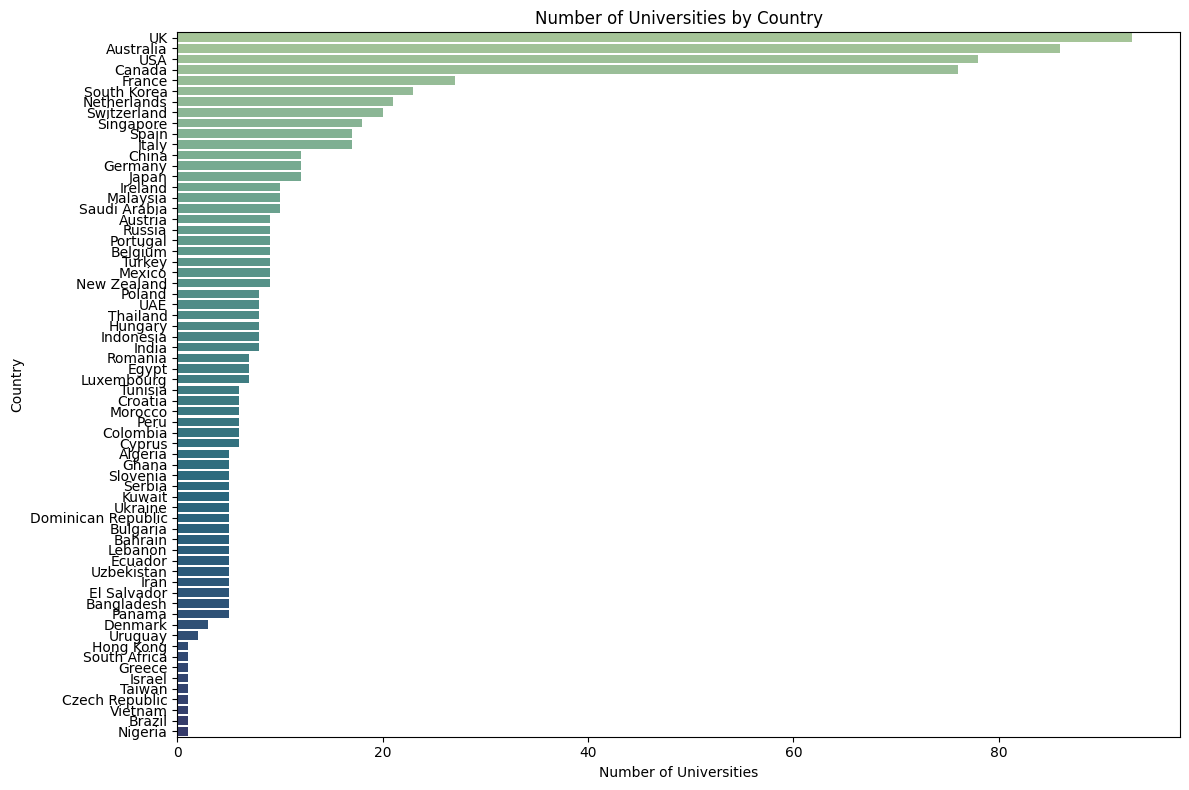

In [11]:
#Second method : using bar Graph

# Count universities per country
uni_counts = data['Country'].value_counts().reset_index()
uni_counts.columns = ['Country', 'University']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='University', y='Country', data=uni_counts, hue='Country' ,palette='crest')
plt.title('Number of Universities by Country')
plt.xlabel('Number of Universities')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Discussion:**

We decided to use the choropleth map above for our data presentation because it provides a more dynamic and visually engaging to represent our data on the number of universities available in each country than bar graph. Other than that, this choropleth map uses colour gradients to show frequency, allowing users to observe the distribution patterns of universities easily.

Additionally, in our interactive dashboard, the choropleth map enables viewers to explore the data intuitively by simply hovering over each country to view information on their number of universities. This enhances user experience and supports better understanding of the geographical spread of our dataset.

From the observation on this map, we can conclude that UK is the country with the highest number of universities with 93 units.

**Dashboard Instruction:**

This map can be access through clicking map option located on the data navigation in the dashboard. This choice will lead you straight to this dataset's choropleth map presentation on number of universities available in each country.

#### **Objective 2**
To show the proportion of education programs across different levels of study.

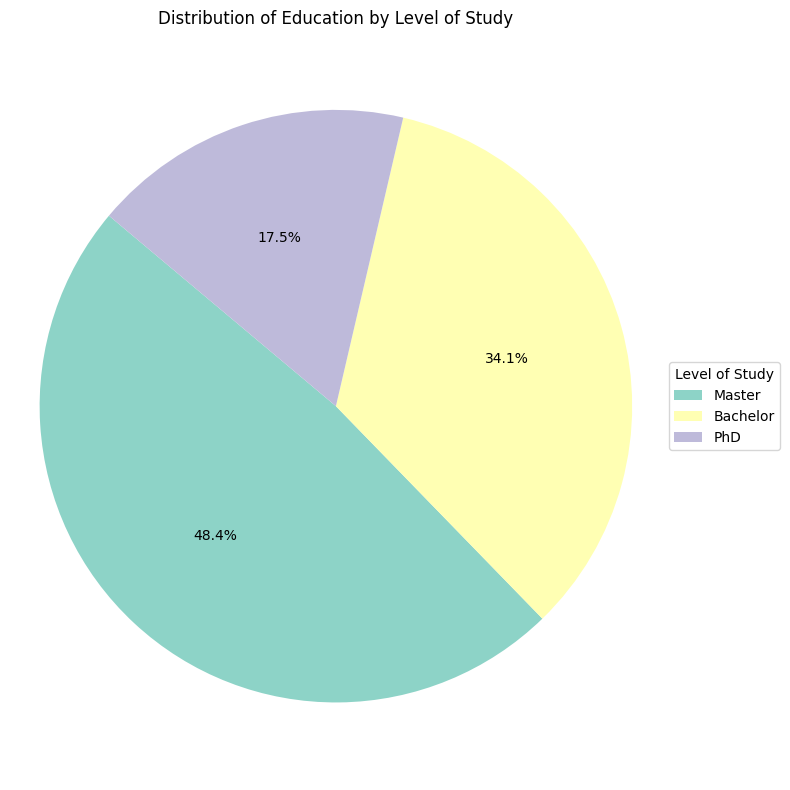

In [12]:
#Method 1 : Pie chart

# Count the number of programs per level of study
level_counts = data['Level'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    level_counts, 
    labels=None,  # Hide inline labels
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set3.colors
)

# Add legend
plt.legend(wedges, level_counts.index, title="Level of Study", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Education by Level of Study')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()


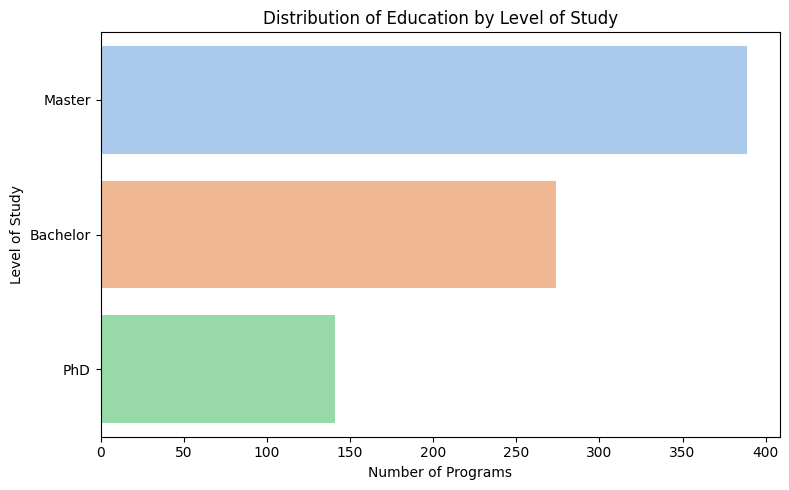

In [13]:
#Method 2 : Bar chart

level_counts = data['Level'].value_counts().reset_index()
level_counts.columns = ['Level of Study', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Level of Study', hue='Level of Study', data=level_counts, palette='pastel')
plt.title('Distribution of Education by Level of Study')
plt.xlabel('Number of Programs')
plt.ylabel('Level of Study')
plt.tight_layout()
plt.show()


**Discussion:**

Since the objective is to show the proportion of each level rather than the exact quantity, the pie chart above is more likely to be chosen over the bar graph. Pie charts are easier to understand at a glance, especially for non-technical audiences, helping them gain a general overview of the matter. Another factor in choosing the pie chart is its eye-catching shapes and patterns, which attract viewers' attention more effectively than a bar graph.

Based on the pie chart above, the dataset shows that Master’s level of study is the most offered, accounting for 48.4% of the total. This is followed by Bachelor’s level at 34.1%, while PhD programs are the least offered, making up 17.5%

**Dashboard Instruction:**

This pie chart is located in 'Dashboard' option which also is the main page, under cost breakdown tab. When filters are applied to the dashboard, this pie chart does not changes as its purpose is to consistently show the overall proportion of education levels.

#### **Objective 3**
To analyse the average costs associated with higher education from various universities.

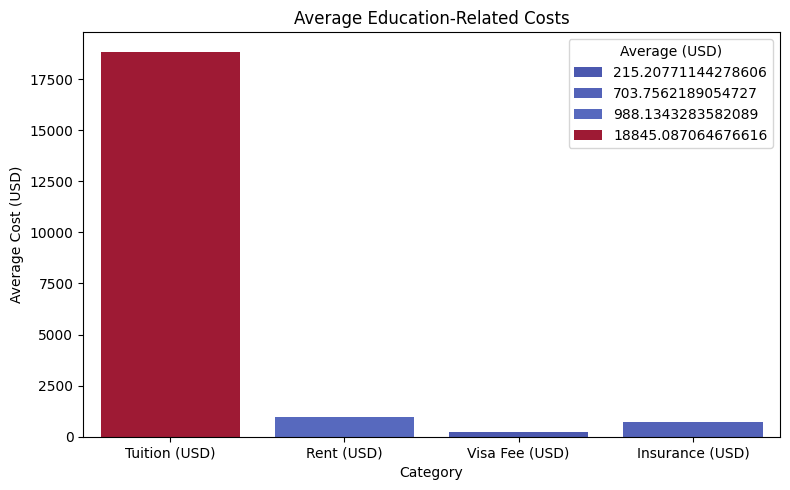

In [14]:
#Method 1 : bar chart

# Calculate average of each cost category
avg_costs = {
    'Tuition (USD)': data['Tuition_USD'].mean(),
    'Rent (USD)': data['Rent_USD'].mean(),
    'Visa Fee (USD)': data['Visa_Fee_USD'].mean(),
    'Insurance (USD)': data['Insurance_USD'].mean()
}

# Convert to DataFrame to plot
avg_costs_data = pd.DataFrame(list(avg_costs.items()), columns=['Cost Category', 'Average (USD)'])

# vertical bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Cost Category', y='Average (USD)', hue='Average (USD)', data=avg_costs_data, palette='coolwarm')
plt.title('Average Education-Related Costs')
plt.xlabel('Category')
plt.ylabel('Average Cost (USD)')
plt.tight_layout()
plt.show()


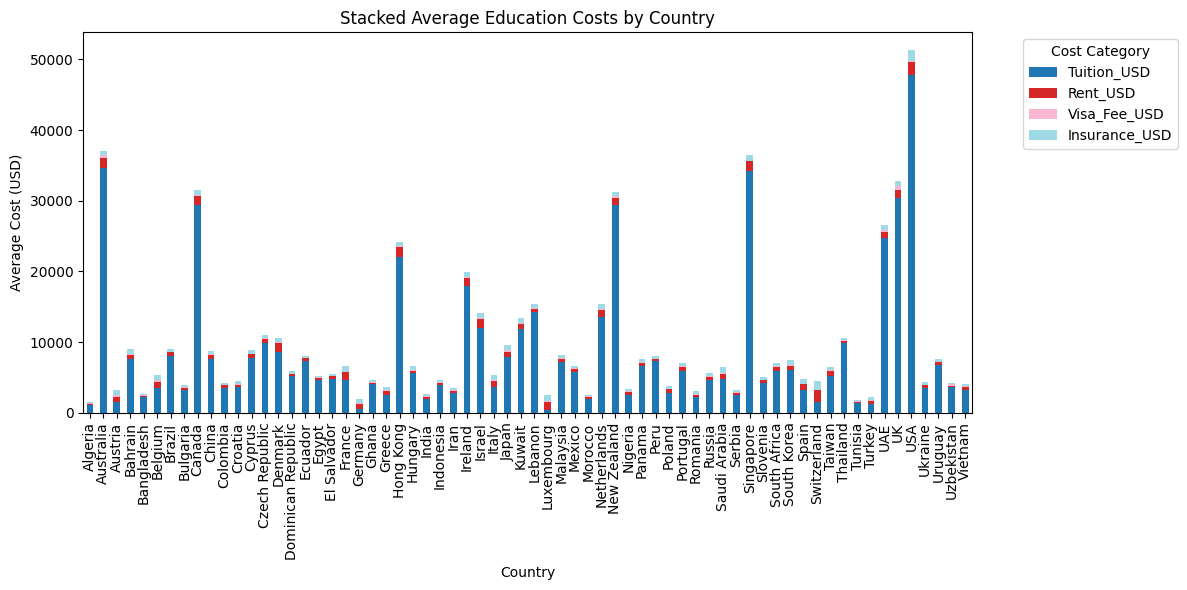

In [15]:
#Method 2 : Stacked bar chart

# Group by Country and calculate mean costs
avg_by_country = data.groupby('Country')[['Tuition_USD', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']].mean()

# Plot stacked bar chart
avg_by_country.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Stacked Average Education Costs by Country')
plt.ylabel('Average Cost (USD)')
plt.xlabel('Country')
plt.legend(title='Cost Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Discussion:**

To analyse the average costs of higher education, we used two graphs, the first is a bar chart showing the average for each cost category across all universities. While the other one is a stacked bar chart. Eventhough stacked bar chart provides deeper insight on cost structures between countries but appear visually complex. That was the main reason we chose to represent this objective with the first method, the bar chart and it also has an easy readibility, which is suitable as a quick summary tool.

Based on the data observations, tuition fees show a significantly larger value compared to other costs, making them the primary contributor to the total cost of education for students. 

**Dashboard Instruction:**

This bar chart is also located under the 'Dashboard' tab. When a filter on the level of education is applied, the chart updates accordingly to reflect the average costs for the selected level of education.

#### **Objective 4**
To compare the average total education cost (USD) across different countries.

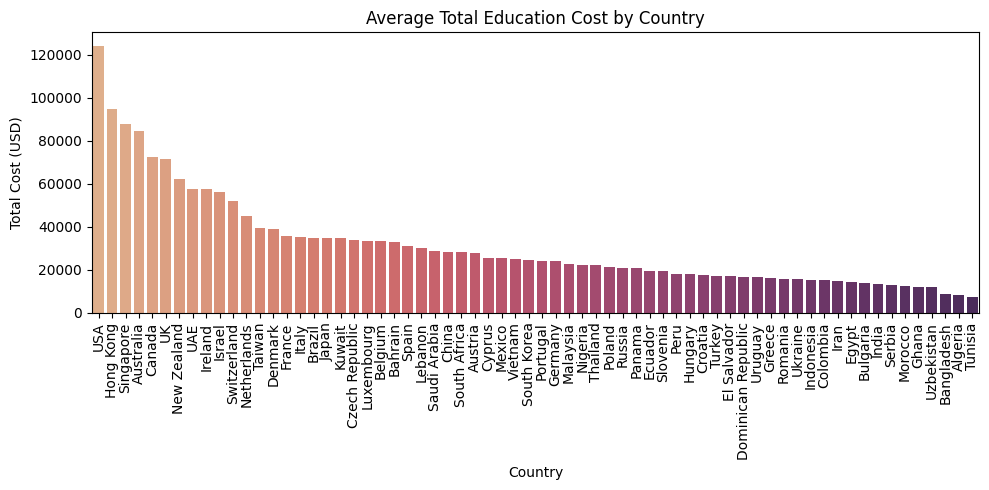

In [16]:
#Method 1 : using bar chart
#Average Total Cost by Country 

avg_cost = data.groupby('Country')['Total_Cost_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_cost.index, y=avg_cost.values, hue=avg_cost.index, palette='flare', legend=False)
plt.title('Average Total Education Cost by Country')
plt.ylabel('Total Cost (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

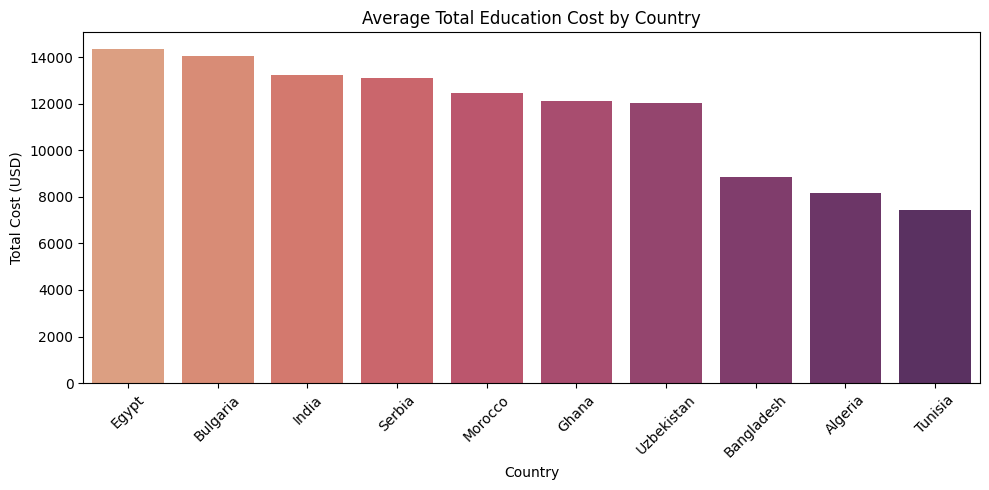

In [17]:
#Top 10 of Average Total Cost by Country (from above)

avg_cost = data.groupby('Country')['Total_Cost_USD'].mean().sort_values(ascending=False).tail(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_cost.index, y=avg_cost.values, hue=avg_cost.index, palette='flare', legend=False)
plt.title('Average Total Education Cost by Country')
plt.ylabel('Total Cost (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

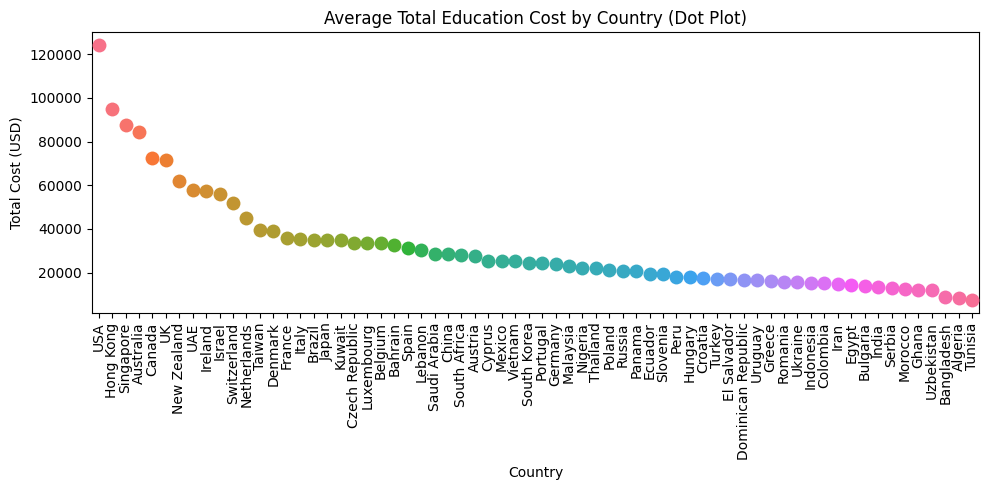

In [18]:
#Method 2 : using dot plot

avg_cost = data.groupby('Country')['Total_Cost_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.stripplot(x=avg_cost.index, y=avg_cost.values, hue=avg_cost.index, palette='husl', size=10)
plt.title('Average Total Education Cost by Country (Dot Plot)')
plt.ylabel('Total Cost (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Discussion:**

Both bar chart and dot plots are effective for comparing average total education costs across countries. However,bar chart is more suitable for dashboards due to its clear visual representation and ease of interpretation, particularly for general audiences. The bar chart also a lot more effective for ranking and comparative overciew as the height of the bars directly reflects differences between countries. While dot plots provides a cleaner, more minimalist look but lacks data spread or distribution, making the comparison seems less impactful.

According to the data in this report, USA recorded the highest average total education cost per year with over 120000 USD. While Tunisia is the lowest with almost 8000 USD.

**Dashboard Instruction:**

This chart being present at 'Distribution' tab. When a filter on the level of education is applied, the chart updates accordingly to reflect the average total education costs for the selected level of education.

#### **Objective 5**
To examine how the number of universities varies across different education-related cost variables.

In [19]:
#calculate University Count and average numeric values
grouped_data = data.groupby("Country").agg({
    "University": "nunique",  # counts unique universities
    "Tuition_USD": "mean",
    "Rent_USD": "mean",
    "Visa_Fee_USD": "mean",
    "Insurance_USD": "mean",
    "Duration_Years": "mean"
}).reset_index()

grouped_data.rename(columns={"University": "University Count"}, inplace=True)

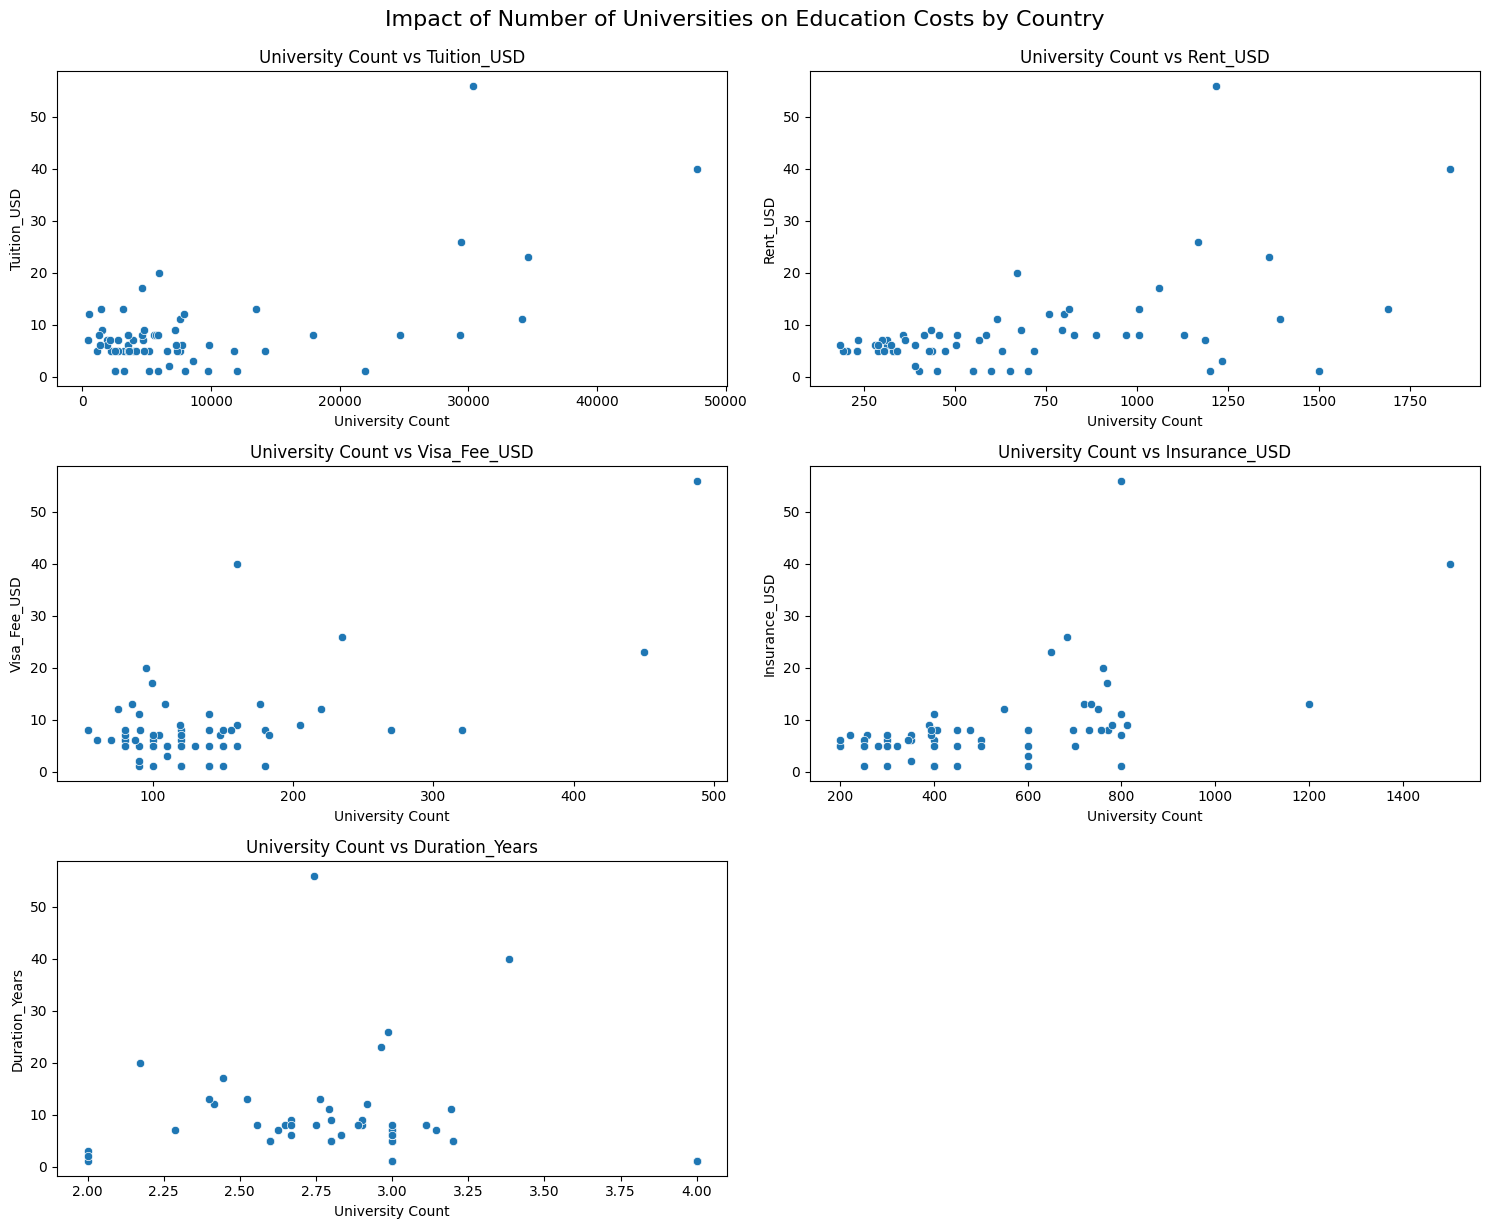

In [20]:
#Method 1 : scatter plots

#numeric columns
numeric_cols = ["Tuition_USD", "Rent_USD", "Visa_Fee_USD", "Insurance_USD", "Duration_Years"]

# Set up multiple subplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=grouped_data, x=col, y="University Count")
    plt.title(f"University Count vs {col}")
    plt.xlabel("University Count")
    plt.ylabel(col)

plt.tight_layout()
plt.suptitle("Impact of Number of Universities on Education Costs by Country", fontsize=16, y=1.02)
plt.show()


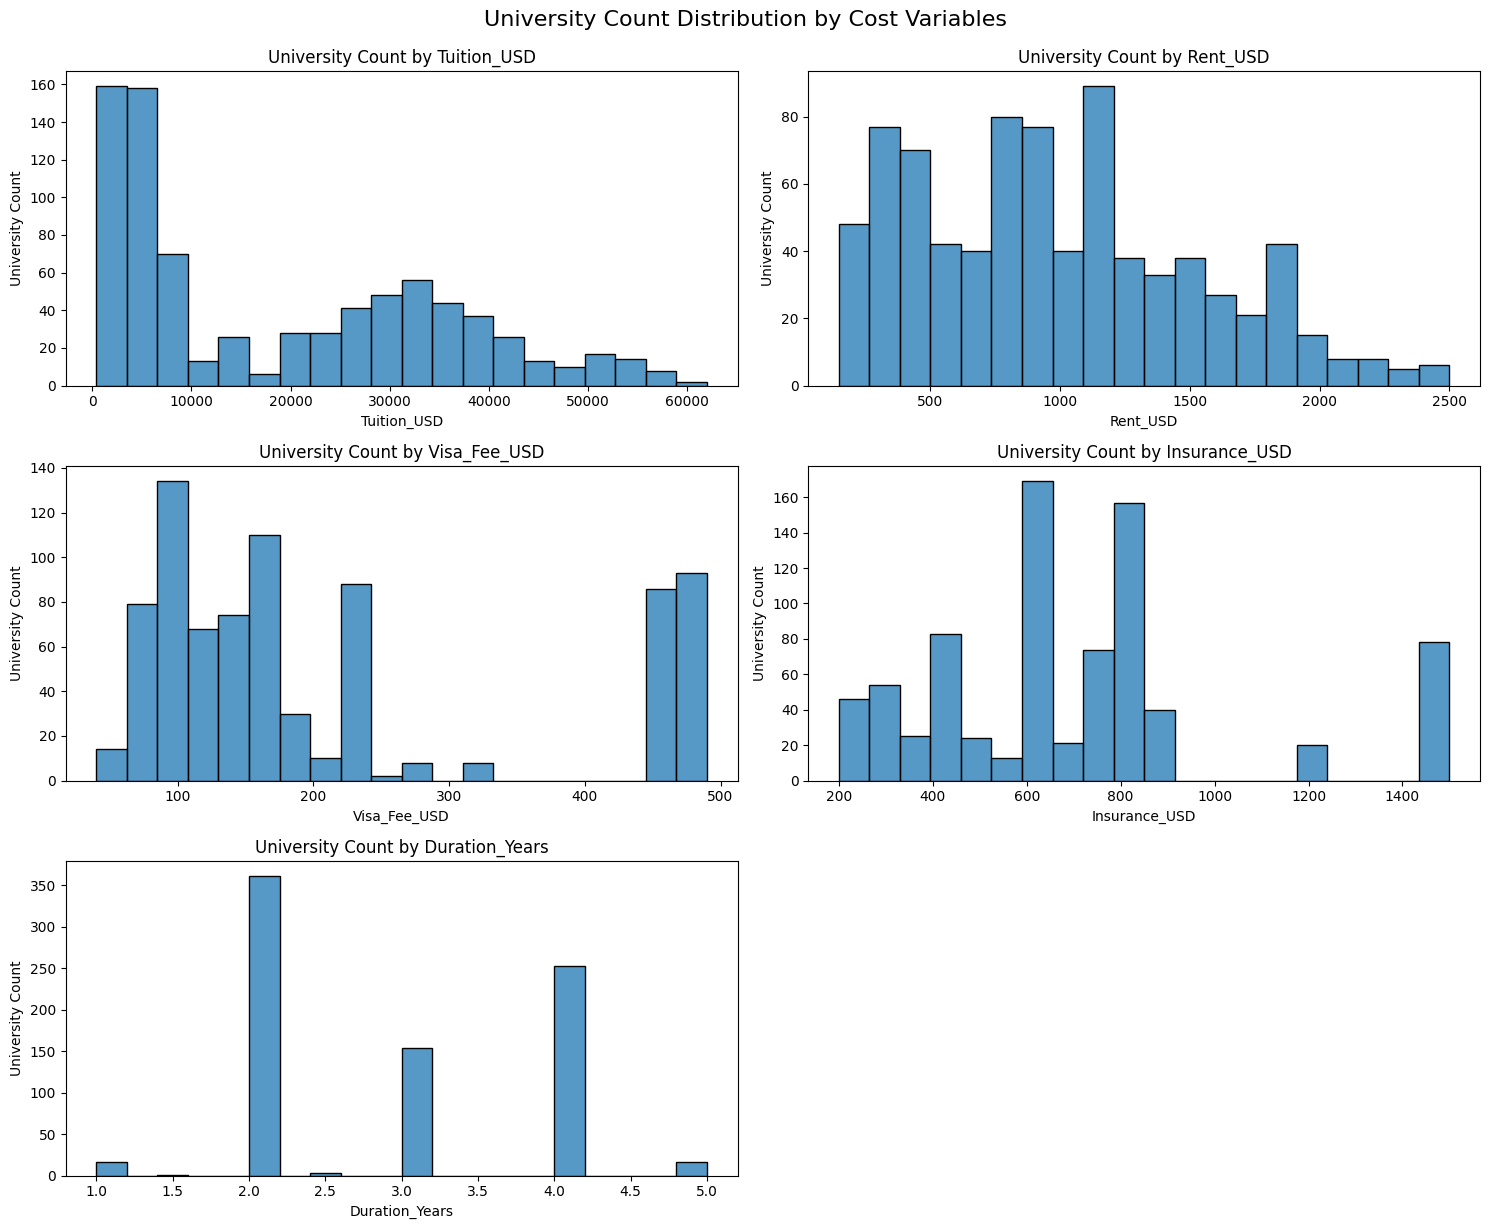

In [21]:
#Method 2 : Histogram
#numeric columns
numeric_cols = ["Tuition_USD", "Rent_USD", "Visa_Fee_USD", "Insurance_USD", "Duration_Years"]

# Set up subplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=20, kde=False)
    plt.title(f"University Count by {col}")
    plt.xlabel(col)
    plt.ylabel("University Count")

plt.tight_layout()
plt.suptitle("University Count Distribution by Cost Variables", fontsize=16, y=1.02)
plt.show()


**Discussion:**

The goal is to examine how the number of universities varies across cost ranges. In this case, a histogram is a more appropriate choice than a scatter plot. Histograms provide a clear view of the distribution by grouping continuous cost values into bins, making it easier to visualise how universities are spread across different cost ranges. On the other hand, scatter plots are more suitable when analysing the relationship between two numeric variables, such as tuition vs. rent, rather than the distribution of a single variable.

1. Tuition_USD: Most universities have tuition fees clustered in the lower range, indicating affordability for many institutions.
2. Rent_USD: Rent costs tend to be concentrated around a moderate range, with a right-skewed distribution.
3. Visa_Fee_USD: It shows uniform distribution, with a few peaks indicating that most universities have visa fees around 100 USD, 150 USD, and 500 USD.
4. Insurance_USD: It shows relatively flat, with the highest peaks at around 600 USD to 700 USD and a smaller peak at 1500 USD.
5. Duration_Years: Most universities offer programs for years, with over 350 of them.

**Dashboard Instruction:**

This multiple chart is located under the 'Dashboard' navigator, within the 'Distribution' tab. Accompanying it is a filter for the numeric variables, allowing users to select specific values. The chart updates dynamically to display the corresponding graph based on the selected numeric variable.

#### **Objective 6**
To visualise trends in student expenses across different study durations.

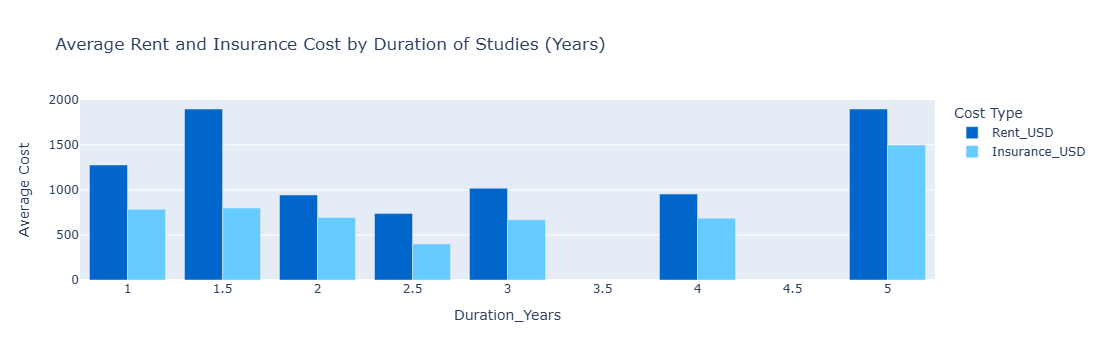

In [26]:
#average (rent and insurance) by duration of studies

# Filter only relevant columns
grouped = data.groupby("Duration_Years")[["Rent_USD", "Insurance_USD"]].mean().reset_index()

grouped_melted = pd.melt(grouped, id_vars=["Duration_Years"], 
                         value_vars=["Rent_USD", "Insurance_USD"],
                         var_name="Cost Type", value_name="Average Cost")

fig = px.bar(grouped_melted, 
             x="Duration_Years", 
             y="Average Cost", 
             color="Cost Type", 
             barmode="group",
             color_discrete_sequence=["#0066CC", "#66CCFF"],  # Adjust colors as needed
             title="Average Rent and Insurance Cost by Duration of Studies (Years)")

fig.show()

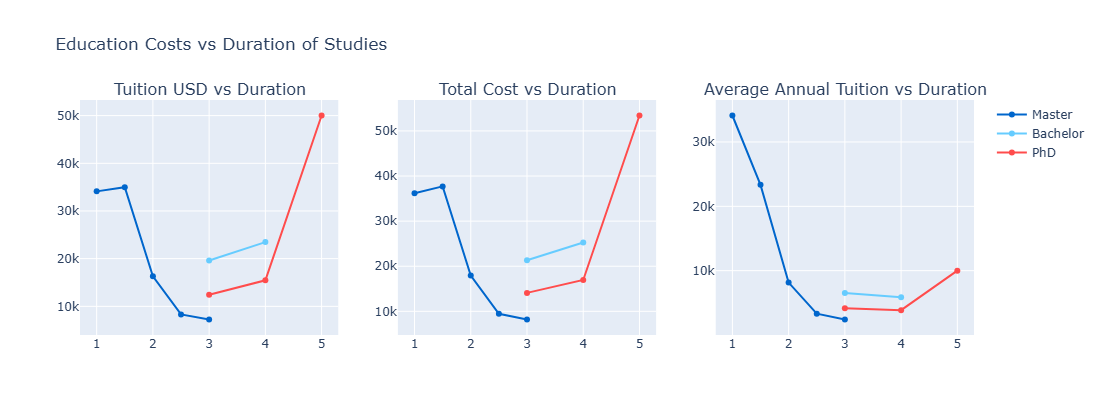

In [30]:
#Tuition_USD, total2 (tuition + rent +insurance) and average annual tuition by duration

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Calculate total cost and average annual tuition
data['Total_Cost2'] = data['Tuition_USD'] + data['Rent_USD'] + data['Insurance_USD']
data['Avg_Annual_Tuition'] = data['Tuition_USD'] / data['Duration_Years']

# Group data for each metric by Duration_Years and Level
grouped_tuition = data.groupby(['Duration_Years', 'Level'])['Tuition_USD'].mean().reset_index()
grouped_total = data.groupby(['Duration_Years', 'Level'])['Total_Cost2'].mean().reset_index()
grouped_avg_annual = data.groupby(['Duration_Years', 'Level'])['Avg_Annual_Tuition'].mean().reset_index()

# Create subplot figure with 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=(
    "Tuition USD vs Duration",
    "Total Cost vs Duration",
    "Average Annual Tuition vs Duration"
))

color_map = {"Bachelor": "#66CCFF", "Master": "#0066CC", "PhD": "#FF4C4C"}

# Add traces for Tuition_USD
for level in grouped_tuition['Level'].unique():
    data_level = grouped_tuition[grouped_tuition['Level'] == level]
    fig.add_trace(
        go.Scatter(x=data_level['Duration_Years'], y=data_level['Tuition_USD'], mode='lines+markers', name=level,
                   line=dict(color=color_map[level]), showlegend=True),
        row=1, col=1
    )

# Add traces for Total Cost
for level in grouped_total['Level'].unique():
    data_level = grouped_total[grouped_total['Level'] == level]
    fig.add_trace(
        go.Scatter(x=data_level['Duration_Years'], y=data_level['Total_Cost2'], mode='lines+markers', name=level,
                   line=dict(color=color_map[level]), showlegend=False),
        row=1, col=2
    )

# Add traces for Average Annual Tuition
for level in grouped_avg_annual['Level'].unique():
    df_level = grouped_avg_annual[grouped_avg_annual['Level'] == level]
    fig.add_trace(
        go.Scatter(x=df_level['Duration_Years'], y=df_level['Avg_Annual_Tuition'], mode='lines+markers', name=level,
                   line=dict(color=color_map[level]), showlegend=False),
        row=1, col=3
    )

# Update layout
fig.update_layout(height=400, width=1200, title_text="Education Costs vs Duration of Studies")

fig.show()

**Discussion:**

The reason behind these visuals is to reflect on how students might budget differently based on program length and level. First thing foremost, across every durations of studies, rent contributes more to annual living expenses than insurance costs in most of the countries. From the grouped bar graphs, it shows a gradual decrease trend for both costs after the first and a half years of studies and sharp increase in the fifth year.

Based on both of the tuition and total cost graphs, it shows the costs decreased significantly for master program throughout the three years and have the lowest with around 5000 USD in some countries. While bachelor program does not have any drastic changes in the dataset, PhD program costs shows a increased sharply after the forth year of studies.

Every year, average tution for both bachelor and PhD programs does not experience much changes as it always around 5000 USD to 10000 USD throughout the study durations for most of the countries involved. But the master program varies as some of them have a higher annual tuition with over 30000 USD compared to others.

**Dashboard Instruction:**

In our dashboard, these diagrams are displayed under the 'Cost Breakdown' tab within the 'Dashboard' navigator. There is a filter provided for the line plots, updating and displaying the visual according to the selested option.

### **ADDITIONAL FINDING**

1. We calculated the average tuition, average rent, and overall average total cost per university.

In [22]:
#find mean and max

agg_results = data[['Tuition_USD', 'Rent_USD', 'Total_Cost_USD']].agg(['mean', 'max'])
print(agg_results)

       Tuition_USD     Rent_USD  Total_Cost_USD
mean  18845.087065   988.134328    54089.871891
max   62000.000000  2500.000000   193860.000000


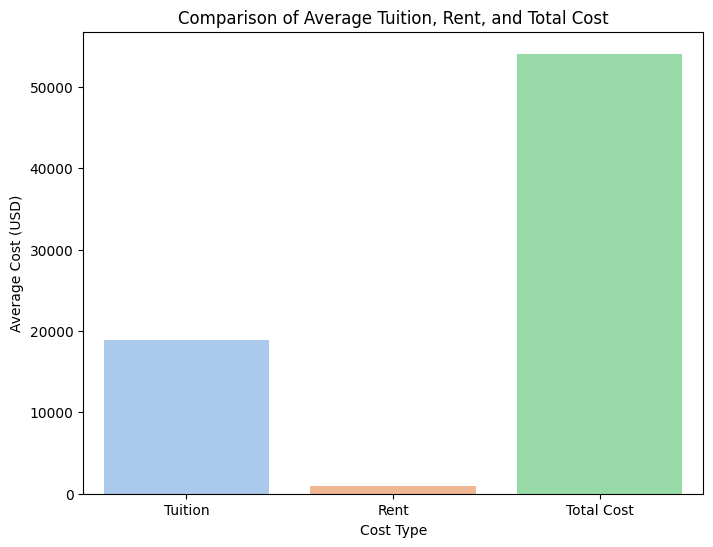

In [23]:
#show in graph, is it suitable?

avg_tuition = data["Tuition_USD"].mean()
avg_rent = data["Rent_USD"].mean()
avg_total = data["Total_Cost_USD"].mean()

# Create DataFrame for plotting
avg_data = pd.DataFrame({
    "Cost Type": ["Tuition", "Rent", "Total Cost"],
    "Average (USD)": [avg_tuition, avg_rent, avg_total]
})

plt.figure(figsize=(8,6))
sns.barplot(data=avg_data, x="Cost Type", y="Average (USD)", hue="Cost Type", palette="pastel")
plt.title("Comparison of Average Tuition, Rent, and Total Cost")
plt.ylabel("Average Cost (USD)")
plt.xlabel("Cost Type")
plt.show()


To clearly compare these components, we presented them in a grouped bar chart. This visualization helps highlight which costs contribute the most to the total and where financial pressure may be most significant for students.

However, in the dashboard, we presented this data in metric cards to help users grasp key values instantly without needing to interpret a chart. This feature located at the main page 'Dashboard' to provide users with a quick overview of essential figures at a glance.

2. Display the top 10 universities by tuition fees in both ascending and descending order.

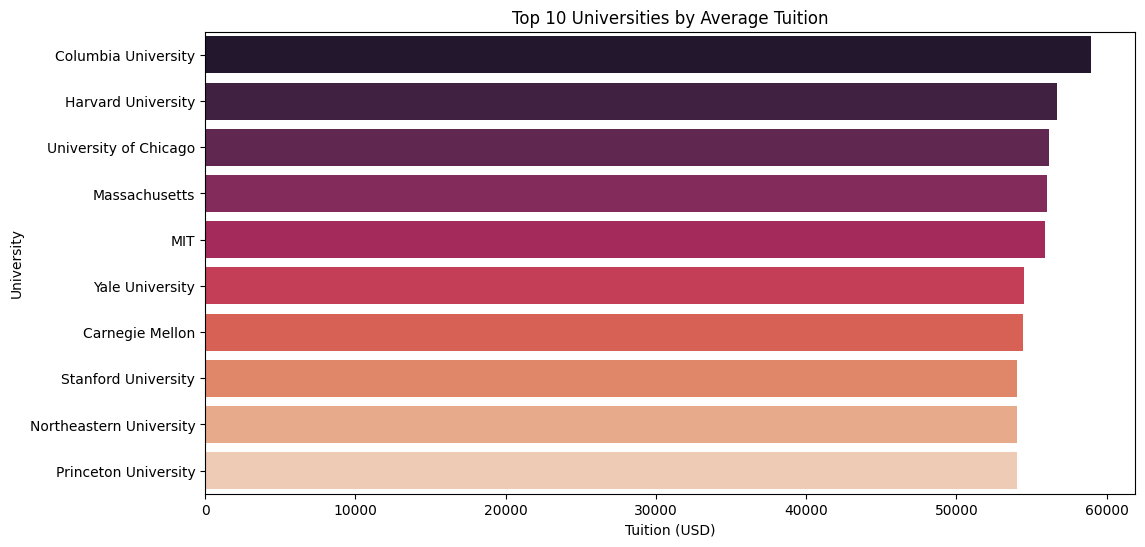

In [24]:
#Tuition by University (Top 10)

top_unis = data.groupby('University')['Tuition_USD'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_unis.index, x=top_unis.values, hue=top_unis.index, palette="rocket")
plt.title('Top 10 Universities by Average Tuition')
plt.xlabel('Tuition (USD)')
plt.ylabel('University')
plt.show()

In [25]:
#arrange by tuition fee (top 10 ascending) - from cheapest
country_exchange = data.groupby('University')['Tuition_USD'].mean().reset_index()
country_exchange['Tuition_USD'] = country_exchange['Tuition_USD'].round(2)
country_exchange = country_exchange.sort_values(by='Tuition_USD', ascending=True).head(10)

country_exchange

,University,Tuition_USD
45,Chamber of Commerce School,400.0
430,University of Luxembourg,400.0
73,European Business University,400.0
177,Miami University Dolibois,400.0
241,Sacred Heart University,400.0
166,Luxembourg School of Business,400.0
165,Luxembourg Institute of Science,400.0
265,TU Darmstadt,450.0
416,University of Jena,450.0
492,University of Stuttgart,450.0


This comparison clearly shown in dashboard as it provides a clear cost spectrum, helping students, and policymakers better understand the financial landscape of global education. It also supports informed decision-making, particularly for students, as it enables them to align their university choices with their financial capacity. At the same time, institutions can use this insight to evaluate how competitively they are priced within the global education market.

3. Cleaned raw data are being displayed under 'University Table' navigator

### **CONCLUSION**

In conclusion, we aim to assist students in understanding how their investment in future education can be cost-efficient. We achieve this by organising and creating visual insights to compare the differences in different countries. To support this, we use multiple types of graphs and charts such as bar charts, scatter plots, choropleth map and others, to display our findings as well as presenting them in the most clear and effective ways.

Besides that, operations like the calculation of total cost were performed to help the students become more aware of the financial responsibility they may face when pursuing their studies. This is not a warning sign, but rather as a reminder to make decision according to their capabilities. Additionally, the average costs on tuition and rent, provide a clearer picture of the financial burden faced by international students. Our interactive dashboard enhances user engagement, enabling real-time filtering and exploration of data for personalized insights.

All in all, we hope this project empowers students to make informed, confident decisions about their academic journey based on data-driven insights.